# <center>Projet mathématique - Partie II

## <center>Chaînes de Markov et temps d’arrêt

In [7]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

In [8]:
def sim_dis(p, x, M):
    y = []
    for i in range(M):
        j = 0
        S = p[0]
        u = np.random.uniform(0, 1)
        while u > S:
            j += 1
            S += p[j]
        y.append(x[j])
    return y

### Q1.(a)

In [9]:
# Initialisation des constantes 
N = 100
a = 10
p = 0.5
M = 1000
X_0 = 5

# Liste de taille M avec que des X_0
res = [X_0 for i in range(M)]

# Liste de taille M avec des booléens qui testent si la ième trajectoire a déjà atteint 'a' ou non (true pour atteint et false pour non atteint)
condition_a = [res[i] == a for i in range(M)]

# Liste de taille M avec des booléens qui testent si la ième trajectoire a déjà atteint 0 ou non (true pour atteint et false pour non atteint)
condition_0 = [res[i] == 0 for i in range(M)]

# Liste de taille M avec les tau des M trajectoires (Q1.b)
l_tau = [0 if (res[i] == a or res[i] == 0) else (N+1) for i in range(M)]

for k in range(N):
    L = sim_dis([p, p], [-1, 1], M)
    for i in range(M):
        # On a pas encore atteint 'a' ou 0 pour la ième trajectoire
        if not condition_a[i] and not condition_0[i]:
            res[i] += L[i]
            # On atteint 'a' donc on change True en False dans la liste condition_a à la ième position
            if (res[i] == a):
                condition_a[i] = True
                # Pour la Q1.b
                l_tau[i] = k

            # On atteint 0 donc on change True en False dans la liste condition_0 à la ième position
            if (res[i] == 0):
                condition_0[i] = True
                l_tau[i] = k


# On compte le nombre de True dans la liste condition_a
compteur = condition_a.count(True)
p_tilde = compteur / M
print("p_tilde = ", p_tilde)

p_tilde =  0.508


► Pour calculer l'intervalle de confiance à 95%, on peut utiliser la formule suivante :
$$ \boxed{ I =\left [\widetilde{p}-q_{0.975} \times \sqrt{\frac{\widetilde{p}(1-\widetilde{p})}{M}}, \  \widetilde{p}+q_{0.975} \times \sqrt{\frac{\widetilde{p}(1-\widetilde{p})}{M}}\right]}$$

avec $q_\alpha$ quantile d'ordre $\alpha$ de la loi normale centrée réduite et donc $q_{0.975} = 1.96$ d'après la table de la loi normale centrée réduite,     
$ M = 1000$ et $\widetilde{p}$  la probabilité estimée précédemment

Démonstration : (Déjà faite dans la partie I, on modélise ici seulement le problème)

On pose $Y_1, ..., Y_M$ un M échantillon iid tel que $\forall i (Y_i = 1) = (X_{\tau} = a$ et $ \tau \leq N)$ et $ (Y_i = 0) = (X_{\tau} \neq  a $ et $ \tau \leq N)$.
On remarque que chaque $Y_i$ suit une loi de Bernoulli de paramètre $\boxed {p = \mathbb{P}\left( X_{\tau} = a \right)}$.  

On pose $\overline{Y_M}$ la moyenne empirique de l'échantillon. Puisque $E[\overline{Y_M}] = E[Y_1] = p$ on peut prendre comme estimateur de $p$, $\widetilde{p} = \overline{Y_M}$

D'après le théorème central limite on a par approximation pour M grand : $$ Z = \sqrt{M} \frac {\overline{Y_M} - E[Y_1]} {\sqrt{V[Y_1]}} \sim N(0,1) $$

In [10]:
# Calcul intervalle de confiance à 95% de P(X_tau = a et tau ≤ N)
borne_inf_1_a = p_tilde - 1.96*np.sqrt(p_tilde*(1-p_tilde)/M)
borne_sup_1_a = p_tilde + 1.96*np.sqrt(p_tilde*(1-p_tilde)/M)
print("Intervalle de confiance à 95% de P(X_tau = a et tau ≤ N) = [", borne_inf_1_a, ",", borne_sup_1_a, "]")

Intervalle de confiance à 95% de P(X_tau = a et tau ≤ N) = [ 0.477013645945352 , 0.538986354054648 ]


► Valeur théorique

On pose $f(x) = P(X_\tau = a | X_0 = x)$ et $ q = 1 - p$

On a $f(0) = 0$ et $f(a) = 1$

 Si $X_{0}=x$, pour tout $x$, $1 \leq x \leq a-1$, on a d'après la loi des probabilités totales et une propriété de Markov

$$
f(x)=p \times f(x+1)+ q \times f(x-1)
$$

L'équation caractéristique associée à cette équation de récurrence linéaire est $p r^{2}-r+q=0$. 

si $p \neq q$ : l'équation a deux racines distinctes, $r_{1}=1$ et $r_{2}=\frac{q}{p}$

La solution générale est donc $f(x)=\lambda r_{1}^{x}+\mu r_{2}^{x}=\lambda+\mu\left(\frac{q}{p}\right)^{x}$

En utilisant les conditions initiales : 

$f(0) = 0$ et $f(a) = 1$ on obtient, $\lambda + \mu = 0 $ et $ \lambda + \mu {(\frac{q}{p})}^a = 1$ 

donc $ \lambda = \frac{1}{1-{(\frac{q}{p})}^a}$ et $ \mu = \frac{-1}{1-{(\frac{q}{p})}^a}$

$$
f(x)=\frac{1-\left(\frac{q}{p}\right)^{x}}{1-\left(\frac{q}{p}\right)^{a}},
$$

si $p=q=\frac{1}{2}$ : l'équation a une racine double, $r_{1}=1$

La solution générale est donc $f(x)= (\lambda + \mu x) r_{1}^{x}=\lambda+\mu x$
 
En utilisant les conditions initiales : 

$$
f(x)=\frac{x}{a}
$$

Dans notre cas $p=q=\frac{1}{2}$ donc pour tout $x$, $1 \leq x \leq a-1$
$$ \boxed{
f(x)=\frac{x}{a} }
$$
et $f(0) = 0$ et $f(a) = 1$
Donc la formule fonctionne pour chaque x dans [0:10]

i.e. : 

$$ \boxed{
    \begin{aligned}
    f(0)&=0  \\
    f(1)&=\frac{1}{10} \\
    f(2)&=\frac{2}{10} \\ 
    f(3)&=\frac{3}{10} \\
    f(4)&=\frac{4}{10} \\
    f(5)&=\frac{5}{10} \\
    f(6)&=\frac{6}{10} \\
    f(7)&=\frac{7}{10} \\
    f(8)&=\frac{8}{10} \\
    f(9)&=\frac{9}{10} \\
    f(10)&= 1 
    \end{aligned}
}
$$

In [11]:
# Vérification si la vraie valeur de la probabilité est dans l'intervalle de confiance

prob_theorique_1_a = 5/10
if prob_theorique_1_a <= borne_sup_1_a and prob_theorique_1_a >= borne_inf_1_a:
    print("La vraie valeur de la probabilité P(X_tau = a | X_0 = 5) se trouve dans l’intervalle de confiance à 95%")
else: 
    print("La vraie valeur de la probabilité P(X_tau = a | X_0 = 5) ne se trouve pas dans l’intervalle de confiance à 95%")

La vraie valeur de la probabilité P(X_tau = a | X_0 = 5) se trouve dans l’intervalle de confiance à 95%


### Q1.(b)

In [12]:
tau_moyen = sum(l_tau) / len(l_tau)
print("tau_moyen = ", tau_moyen)

tau_moyen =  24.081


In [13]:
# Calcul intervalle de confiance à 95% du tau_moyen
somme_quadratique_1_b = 0
for i in range(M):
    somme_quadratique_1_b += (l_tau[i] - tau_moyen)**2

variance_1_b = somme_quadratique_1_b / (M-1)

borne_inf_1_b = tau_moyen - 1.96*np.sqrt(variance_1_b/M)
borne_sup_1_b = tau_moyen + 1.96*np.sqrt(variance_1_b/M)
print("Intervalle de confiance à 95% de P(X_tau = a et tau ≤ N) = [", borne_inf_1_b, ",", borne_sup_1_b, "]")

Intervalle de confiance à 95% de P(X_tau = a et tau ≤ N) = [ 22.837483932281906 , 25.324516067718093 ]


► Valeur théorique

On pose $g(x)=E\left[T \mid X_{0}=x\right]$ qui vérifie cette équation qui est une suite récurrente linéaire que l'on doit résoudre :
$$
g(x)=1+p g(x+1)+q g(x-1)
$$

lorsque $1 \leq x \leq a-1$. En effet, le joueur doit jouer au moins une fois, et avec la  probabilité $p$ (resp., $q$ ) la fortune du joueur sera $x+1$ (resp., $x-1)$, et donc $g(x+1)$ (resp.,  $g(x-1))$ tours supplémentaires seront en moyenne nécessaires pour finir le jeu. Les conditions aux frontières sont $$
g(0)=0, g(a)=0
$$

Réécrivons l'équation de récurrence sous la forme $-1=p(g(x+1)-g(x))-q(g(x)-g(i-1))$. Notant $$
y_{x}=g(x)-g(x-1)$$ on a, pour $1 \leq x \leq a-1$ $$
-1=p y_{i+1}-q y_{i}
$$

et $$
g(x)=y_{1}+y_{2}+\cdots+y_{x}
$$

Nous allons résoudre cette équation de récurrence avec $p=q=\frac{1}{2}$. Pour cela, on la réécrit $$
\begin{aligned}
-1 & =\frac{1}{2} y_{2}-\frac{1}{2} y_{1}, \\
-1 & =\frac{1}{2} y_{3}-\frac{1}{2} y_{2}, \\
& \vdots \\
-1 & =\frac{1}{2} y_{x}-\frac{1}{2} y_{x-1},
\end{aligned}
$$

et donc, en sommant, $$
-(x-1)=\frac{1}{2} y_{x}-\frac{1}{2} y_{1}
$$

c'est-à-dire, pour $1 \leq x \leq a$ $$
y_{x}=y_{1}-2(x-1)
$$

Reportant cette expression dans $g(x)=y_{1}+y_{2}+\cdots+y_{x}$, et observant que $y_{1}=g(1)$, on obtient $$
g(x)=x g(1)-2[1+2+\cdots+(x-1)]=x g(1)-x(x-1)
$$

La condition $g(a)=0$ donne $a g(1)=a(a-1)$ et donc, finalement, $$ \boxed {g(x) = x(a-x)}$$
Donc $g(5) = 5(10-5) = 25$

In [14]:
# Vérification si la vraie valeur théorique est dans l'intervalle de confiance

thau_theorique_1_b = 25
if thau_theorique_1_b <= borne_sup_1_b and thau_theorique_1_b >= borne_inf_1_b:
    print("La vraie valeur théorique du thau moyen se trouve dans l’intervalle de confiance à 95%")
else: 
    print("La vraie valeur théorique du thau moyen ne se trouve pas dans l’intervalle de confiance à 95%")

La vraie valeur théorique du thau moyen se trouve dans l’intervalle de confiance à 95%


On remarque que la valeur théorique est souvent pas dans l'intervalle de confiance à 95%. Cela est dû à notre calcul de tau moyen qui prend en compte que le max est N+1 alors qu'ici il n'y a pas de maximum, par conséquent on trouve une valeur empirique un petit peu inférieur à 25.

### Q1.(c)

In [15]:
# Initialisation des constantes 
N = 100
a = 10
p = 0.8
M = 1000
X_0 = 5

# Liste de taille M avec que des X_0
res_1_c = [X_0 for i in range(M)]

# Liste de taille M avec des booléens qui testent si la ième trajectoire a déjà atteint 'a' ou non (true pour atteint et false pour non atteint)
condition_a_1_c = [res_1_c[i] == a for i in range(M)]

# Liste de taille M avec des booléens qui testent si la ième trajectoire a déjà atteint 0 ou non (true pour atteint et false pour non atteint)
condition_0_1_c = [res_1_c[i] == 0 for i in range(M)]

# Liste de taille M avec les tau des M trajectoires (Q1.b)
l_tau_1_c = [0 if (res_1_c[i] == a or res_1_c[i] == 0) else (N+1) for i in range(M)]

for k in range(N):
    L = sim_dis([1-p, p], [-1, 1], M)
    for i in range(M):
        # On a pas encore atteint 'a' ou 0 pour la ième trajectoire
        if not condition_a_1_c[i] and not condition_0_1_c[i]:
            res_1_c[i] += L[i]
            # On atteint 'a' donc on change True en False dans la liste condition_a à la ième position
            if (res_1_c[i] == a):
                condition_a_1_c[i] = True
                # Pour la Q1.b
                l_tau_1_c[i] = k

            # On atteint 0 donc on change True en False dans la liste condition_0 à la ième position
            if (res_1_c[i] == 0):
                condition_0_1_c[i] = True
                l_tau_1_c[i] = k


# On compte le nombre de True dans la liste condition_a
compteur_1_c = condition_a_1_c.count(True)
p_tilde_1_c = compteur_1_c / M
print("p_tilde = ", p_tilde_1_c)

p_tilde =  0.999


In [16]:
# Calcul intervalle de confiance à 95% de P(X_tau = a et tau ≤ N)
borne_inf_1_c = p_tilde_1_c - 1.96*np.sqrt(p_tilde_1_c*(1-p_tilde_1_c)/M)
borne_sup_1_c = p_tilde_1_c + 1.96*np.sqrt(p_tilde_1_c*(1-p_tilde_1_c)/M)
print("Intervalle de confiance à 95% de P(X_tau = a et tau ≤ N) = [", borne_inf_1_c, ",", borne_sup_1_c, "]")

# Vérification si la vraie valeur de la probabilité est dans l'intervalle de confiance
prob_theorique_1_a = 0.99902439024
if prob_theorique_1_a <= borne_sup_1_a and prob_theorique_1_a >= borne_inf_1_a:
    print("La vraie valeur de la probabilité P(X_tau = a | X_0 = 5) se trouve dans l’intervalle de confiance à 95%")
else: 
    print("La vraie valeur de la probabilité P(X_tau = a | X_0 = 5) ne se trouve pas dans l’intervalle de confiance à 95%")

Intervalle de confiance à 95% de P(X_tau = a et tau ≤ N) = [ 0.9970409802451226 , 1.0009590197548774 ]
La vraie valeur de la probabilité P(X_tau = a | X_0 = 5) ne se trouve pas dans l’intervalle de confiance à 95%


In [18]:
tau_moyen_1_c = sum(l_tau_1_c) / len(l_tau_1_c)
print("tau_moyen = ", tau_moyen_1_c)

# Calcul intervalle de confiance à 95% du tau_moyen
somme_quadratique_1_c = 0
for i in range(M):
    somme_quadratique_1_c += (l_tau_1_c[i] - tau_moyen_1_c)**2

variance_1_c = somme_quadratique_1_c / (M-1)

borne_inf_1_c = tau_moyen_1_c - 1.96*np.sqrt(variance_1_c/M)
borne_sup_1_c = tau_moyen_1_c + 1.96*np.sqrt(variance_1_c/M)
print("Intervalle de confiance à 95% de P(X_tau = a et tau ≤ N) = [", borne_inf_1_c, ",", borne_sup_1_c, "]")

tau_moyen =  7.364
Intervalle de confiance à 95% de P(X_tau = a et tau ≤ N) = [ 7.117606036291975 , 7.610393963708025 ]


### Q2.(a)

In [19]:
import numpy as np
import matplotlib.pyplot as plt

# Création de la matrice de transition
P = np.random.rand(10, 10)
P /= P.sum(axis=1, keepdims=True)

# Initialisation des variables
N = 1000
zone = 0
zone_history = np.zeros(N, dtype=int)
time_in_each_zone = np.zeros(10, dtype=int)

# Simulation de la trajectoire de la chaîne de Markov
for t in range(N):
    zone_history[t] = zone
    time_in_each_zone[zone] += 1
    zone = np.random.choice(10, p=P[zone])

# Calcul de la fraction de temps passée dans chaque état
fraction_of_time_in_each_zone = time_in_each_zone / N

# Affichage des résultats
for i in range(10):
    print(f"pi_{i+1} = {fraction_of_time_in_each_zone[i]}")

pi_1 = 0.102
pi_2 = 0.08
pi_3 = 0.052
pi_4 = 0.075
pi_5 = 0.092
pi_6 = 0.089
pi_7 = 0.142
pi_8 = 0.122
pi_9 = 0.138
pi_10 = 0.108


Ce code génère d'abord une matrice de transition avec des coefficients strictement positifs. Ensuite, il initialise l'état de l'étudiant à la zone 1 (index 0 dans le code Python). Il simule ensuite les mouvements de l'étudiant sur le plateau de jeu en utilisant la matrice de transition pour déterminer la zone suivante à chaque étape. Le code enregistre l'histoire des zones et le temps passé dans chaque zone. Enfin, il calcule la fraction de temps passée dans chaque zone et affiche les résultats.

On note que les résultats de ce script seront différents à chaque exécution en raison de l'utilisation de nombres aléatoires pour générer la matrice de transition et pour simuler les mouvements de l'étudiant.

$\pi ^{\bot} P = \pi ^{\bot}$, est l'équation d'équilibre ou d'état stationnaire pour une chaîne de Markov. Si une telle solution π existe, cela signifie que la chaîne de Markov a une distribution de probabilité stable.

Dans ce cas, chaque $\pi_{i}$ représente la probabilité à long terme d'être dans l'état $i$. Si vous lancez la simulation de la chaîne de Markov pour un grand nombre de pas, on devrait observer que la fraction de temps passée dans chaque état se rapproche de $\pi_{i}$. C'est une manifestation de la loi des grands nombres.

Cependant, il est important de noter que l'existence d'une telle solution dépend des propriétés de la matrice de transition $P$. Par exemple, pour qu'une distribution stationnaire unique existe, la chaîne de Markov doit être irréductible (tous les états sont accessibles à partir de tous les autres) et apériodique (il n'y a pas de cycles répétitifs), ce qui est le cas ici.

In [20]:
from numpy.linalg import lstsq

# Ajouter une contrainte pour la somme des πi = 1
P_ = np.append(P.T - np.eye(10), [[1]*10], axis=0)

b = np.append(np.zeros(10), 1)

# Résoudre l'équation d'équilibre
pi, _, _, _ = lstsq(P_, b, rcond=None)

print("Solution de l'équation d'équilibre :", pi)

Solution de l'équation d'équilibre : [0.09282632 0.09269045 0.05951093 0.07369742 0.0987841  0.09322543
 0.13717525 0.1265912  0.11458108 0.11091782]


Ce code construit d'abord une nouvelle matrice $P\_$ qui est la transposition de $P$ moins l'identité, avec une ligne supplémentaire pour la contrainte que la somme des $\pi_{i}$ doit être égale à 1. Le vecteur $b$ est construit de manière à correspondre à cette nouvelle matrice. Ensuite, l'équation d'équilibre est résolue pour trouver $\pi$.

Si on compare les résultats de cette solution avec les fractions de temps calculées dans la simulation de la chaîne de Markov, on observe qu'elles se rapprochent à mesure que N augmente.

### Q2.(b)

On se place dans le cas où la zone de départ est la zone 8 par exemple

In [21]:
import numpy as np
import matplotlib.pyplot as plt

# Initialisation des variables
N = 1000
zone2 = 7
zone_history2 = np.zeros(N, dtype=int)
time_in_each_zone2 = np.zeros(10, dtype=int)

# Simulation de la trajectoire de la chaîne de Markov
for t in range(N):
    zone_history2[t] = zone2
    time_in_each_zone2[zone2] += 1
    zone2 = np.random.choice(10, p=P[zone2])

# Calcul de la fraction de temps passée dans chaque état
fraction_of_time_in_each_zone2 = time_in_each_zone2 / N

# Affichage des résultats
for i in range(10):
    print(f"pi_{i+1} = {fraction_of_time_in_each_zone2[i]}")

pi_1 = 0.094
pi_2 = 0.098
pi_3 = 0.062
pi_4 = 0.072
pi_5 = 0.096
pi_6 = 0.086
pi_7 = 0.124
pi_8 = 0.139
pi_9 = 0.115
pi_10 = 0.114


On observe que les fractions de temps passées dans les zones sont proches de celles dans le cas précédent, la position de départ n'a donc que peu d'influence sur le temps passés dans chaque zone, et est surtout lié à la matrice de probabilité de passage 

### Q3

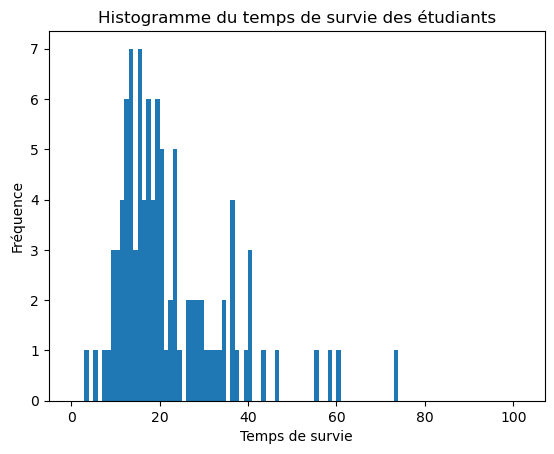

Temps de survie moyen : 21.79 tours


In [22]:
import random
import math
import matplotlib.pyplot as plt
import numpy as np

def sim_dis(p, x, M):
    y = []
    for i in range(M):
        j = 0
        S = p[0]
        u = np.random.uniform(0, 1)
        while u > S:
            j += 1
            S += p[j]
        y.append(x[j])
    return y



def death_time(N_e, N_s, P, Q, N):
    """
    Calcule le temps de survie de la population d'étudiants.
    """
    # liste de taille N_e avec False par défaut (True = mort)
    booleen = []
    for i in range(N_e):
        booleen.append(False)

    # Initialisation de la position des étudiants et du monstre
    X = np.ones(N_e, dtype=int)
    Y = N_s

    # Simulation de la chaîne de Markov
    # Vu que X0 = 1 pour les M simulations on peut appliquer directement le code suivant
    L = sim_dis(P[0], range(1, N_s+1), N_e)
    X = L
    for j in range(1,N):

        # déplacement chaque joueur
        for i in range(N_e):
            L = sim_dis(P[X[i]-1], range(1, N_s+1), 1)
            X[i] = L[0]

            # monstre manger joueur si même case
            if Y == X[i]:
                booleen[i] = True

        # on regarde si tous les joueurs sont morts i.e. booleen est rempli de True
        if all(elem == True for elem in booleen):
            return j
        
    return N+1

# Définition des paramètres
N_e = 5
N_s = 10
N3 = 100
M3 = 100
P3 = np.random.rand(N_s, N_s)
P3 = P3 / np.sum(P3, axis=1, keepdims=True)
Q = np.array([[0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1],
              [0, 0, 0, 0, 0, 0, 0, 0, 0, 1]])

# Simulation de la chaîne de Markov pour M fois
T = np.zeros(M3)
for i in range(M3):
    T[i] = death_time(N_e, N_s, P3, Q, N3)

# Tracé de l'histogramme du temps de survie de la population d'étudiants
plt.hist(T, bins=range(0, N3+3))
plt.title('Histogramme du temps de survie des étudiants')
plt.xlabel('Temps de survie')
plt.ylabel('Fréquence')
plt.show()

# Calcul du temps de survie moyen des populations d'étudiants
T_mean = np.mean(T)
print('Temps de survie moyen :', T_mean, 'tours')

Pour calculer le temps de survie moyen exact de l'étudiant, il est nécessaire de déterminer la probabilité de survie en fonction du temps.

Soit $P\in \mathcal{M}_{10,10}(\mathbb{R})$ la matrice de transition,

$\forall i,j \in \left\{ 1,\ldots,10 \right\}^2, P_{i,j} =$ probabilité de passer de la zone $i$ à la zone $j$

Comme le monstre ne bouge pas et reste dans la zone 10 on considère que la zone 10 est un état absorbant. L'étudiant ne peut jamais sortir de cette zone une fois qu'il y est entré.

Soit $p_{n} \in \mathcal{M}_{10,1}(\mathbb{R})$ tel que

$\forall i \in \left\{ 1,\ldots,10 \right\}, (p_{n})_{i,1} =$ probabilité que l'étudiant se trouve dans la zone $i$ au $n$-ième tour

Soit $i \in \left\{ 1,\ldots,10 \right\}$, on a
$$(p_{n})_{i,1} = \sum_{j=1}^{10} (p_{n-1})_{j,1} P_{j,i} \space \space (*)$$

On pose alors $q_{n}$ tel que :
$$q_{n} = (1-(p_{1})_{10,1})(1-(p_{2})_{10,1}) \ldots (1-(p_{n-1})_{10,1}) ((p_{n})_{10,1})$$

On remarque que $q_{n}$ est la probabilité que le joueur arrive dans la zone 10 au $n$-ième tour sans jamais y être arrivé dans les tours précédents.

Le temps de survie moyen est ainsi donné par :
$$\tau_{moyen} = \sum_{n=0}^{+\infty} n q_{n}$$

Connaissant $(p_{n})_{10,1}$ pour tout $n \in \mathbb{N}$ (en utilisant la formule en $(*)$), on peut calculer le temps moyen.

### Q4

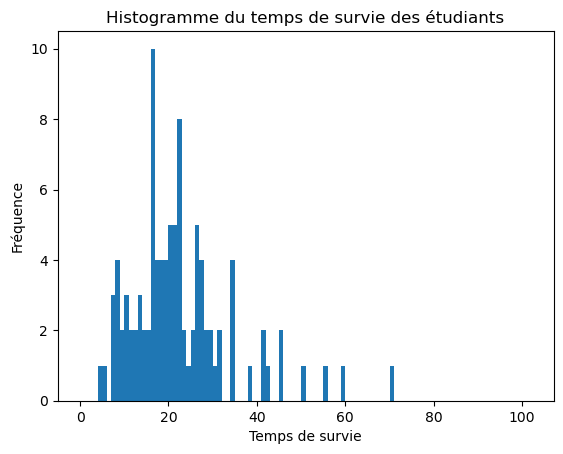

Temps de survie moyen : 21.96 tours


In [24]:
def death_time(N_e, N_s, P, Q, N):
    """
    Calcule le temps de survie de la population d'étudiants.
    """
    # liste de taille N_e avec False par défaut (True = mort)
    booleen = []
    for i in range(N_e):
        booleen.append(False)

    # Initialisation de la position des étudiants et du monstre
    X = np.ones(N_e, dtype=int)
    Y = N_s

    # Simulation de la chaîne de Markov
    # Vu que X0 = 1 pour les M simulations on peut appliquer directement le code suivant
    L = sim_dis(P[0], range(1, N_s+1), N_e)
    X = L
    for j in range(1,N):
        # déplacement monstre
        Y = sim_dis(Q[Y-1], range(1, N_s+1), 1)[0]

        # déplacement chaque joueur
        for i in range(N_e):
            L = sim_dis(P[X[i]-1], range(1, N_s+1), 1)
            X[i] = L[0]

            # monstre manger joueur si même case
            if Y == X[i]:
                booleen[i] = True

        # on regarde si tous les joueurs sont morts i.e. booleen est rempli de True
        if all(elem == True for elem in booleen):
            return j
        
    return N+1

# Définition des paramètres
N_e = 5
N_s = 10
N4 = 100
M4 = 100
P4 = np.random.rand(N_s, N_s)
P4 = P4 / np.sum(P4, axis=1, keepdims=True)
Q = np.array([[0.1, 0.05, 0.05, 0.1, 0.05, 0.05, 0.1, 0.05, 0.05, 0.4],
              [0.1, 0.05, 0.1, 0.05, 0.1, 0.05, 0.1, 0.05, 0.1, 0.3],
              [0.1, 0.05, 0.05, 0.1, 0.05, 0.05, 0.1, 0.05, 0.05, 0.4],
              [0.1, 0.05, 0.1, 0.05, 0.1, 0.05, 0.1, 0.05, 0.1, 0.3],
              [0.1, 0.05, 0.05, 0.1, 0.05, 0.05, 0.1, 0.05, 0.05, 0.4],
              [0.1, 0.05, 0.1, 0.05, 0.1, 0.05, 0.1, 0.05, 0.1, 0.3],
              [0.1, 0.05, 0.05, 0.1, 0.05, 0.05, 0.1, 0.05, 0.05, 0.4],
              [0.1, 0.05, 0.1, 0.05, 0.1, 0.05, 0.1, 0.05, 0.1, 0.3],
              [0.1, 0.05, 0.05, 0.1, 0.05, 0.05, 0.1, 0.05, 0.05, 0.4],
              [0.1, 0.05, 0.1, 0.05, 0.1, 0.05, 0.1, 0.05, 0.1, 0.3]])

# Simulation de la chaîne de Markov pour M fois
T = np.zeros(M4)
for i in range(M4):
    T[i] = death_time(N_e, N_s, P4, Q, N4)

# Tracé de l'histogramme du temps de survie de la population d'étudiants
plt.hist(T, bins=range(0, N4+3))
plt.title('Histogramme du temps de survie des étudiants')
plt.xlabel('Temps de survie')
plt.ylabel('Fréquence')
plt.show()

# Calcul du temps de survie moyen des populations d'étudiants
T_mean = np.mean(T)
print('Temps de survie moyen :', T_mean, 'tours')

Soit $f(i,j) = E[$temps de survie avec $J_{0} = i, M_{0} = j]$

Soit $P((i,j),(h,l))$ la probabilité de passer de l'état $(J=i, M=j)$ à $(J=h, M=l)$

$$P((i,j)(h,l)) = p_{i,j} p_{h,l}$$ où $p_{i,j}$ et $p_{h,l}$ sont les coefficient de la matrice de transition initiale

$[J,M]$ est une chaîne de Markov
$$f(i,j) = \sum_{1\leqslant h,l\leqslant 10 \space \space h \neq l}^{} f(h,l)P((i,j),(h,l)) + 1$$

On résoud le système et on prend en particulier $f(1,10)$ qui est le temps réel de survie